In [1]:
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

from scipy.stats import expon, norm
from matplotlib.pyplot import figure


Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе).

Я выбрала экспоненциальное распределение.

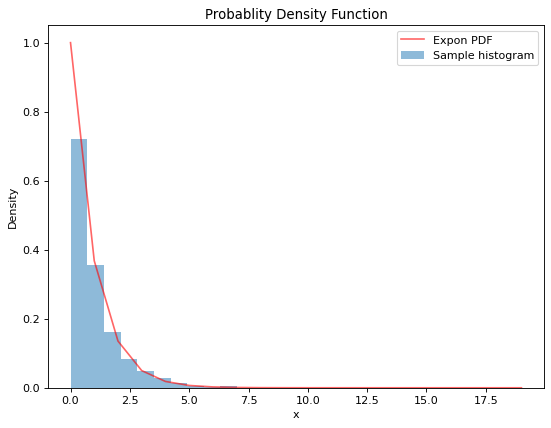

In [2]:
# некоторые подготовления для графиков
figure(figsize=(8, 6), dpi=80)

# сгенерируем выборку на 1000 элементов
sample = expon.rvs(size=1000)

# определение гистограммы
plt.hist(sample, density=True, histtype='stepfilled', alpha=0.5, label='Sample histogram')

# определение графика теоретической плотности экспоненциального распределения
x = np.arange(0., 20., 1)
plt.plot(x, expon.pdf(x), 'r', alpha=0.6, label='Expon PDF')

plt.xlabel('x')
plt.ylabel('Density')
plt.title('Probablity Density Function')
plt.legend();


Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

In [3]:
# рассчитаем основные метрики

mean, var, skew, kurt = expon.stats(moments='mvsk')
print('Математическое ожидание (Mean): ', mean)
print('Дисперсия (Variance): ', var)
print('Третий момент (Skewness): ', skew)
print('(Excess kurtosis): ', kurt)

Математическое ожидание (Mean):  1.0
Дисперсия (Variance):  1.0
Третий момент (Skewness):  2.0
(Excess kurtosis):  6.0


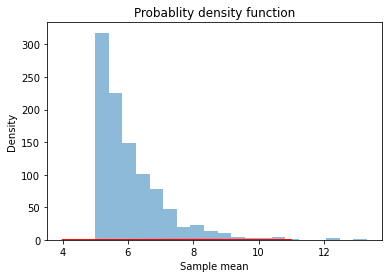

In [4]:
# вычисляется среднее из 1000 выборок для n = 10
smeans = []
for i in range(1000):
    smeans.append(expon.rvs(5).mean())
    
# строим гистограмму
plt.hist(smeans, 20, alpha=0.5, label='Sample Means Histogram')

k = 8

# строим pdf нормального распределения
x = np.arange(4.,12.,1)
plt.plot(x, norm.pdf(x, k, np.sqrt(2 * k/ 10.)), 'r', alpha=1, label='Theoretical pdf - normal D.')
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.title('Probablity density function')
plt.show()

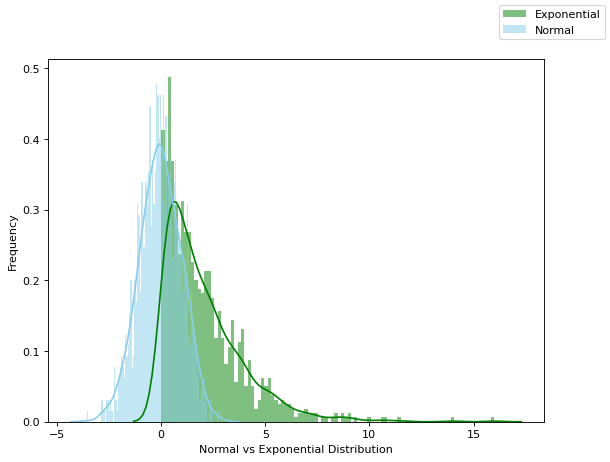

In [7]:
figure(figsize=(8, 6), dpi=80)

expon_distr = expon.rvs(scale=2, loc=0, size=1000)

normal_distr = norm.pdf(size=1000, loc=0, scale=1)


ax = sns.distplot(expon_distr,
                  kde=True,
                  bins=100,
                  color='green',
                  label='Exponential',
                  hist_kws={"linewidth": 15,'alpha':0.5})

ax2 = sns.distplot(normal_distr,
                  bins=100,
                  kde=True,
                  color='skyblue',
                   label='Normal',
                  hist_kws={"linewidth": 15,'alpha':0.5})

ax2.set(xlabel='Normal vs Exponential Distribution', ylabel='Frequency')
ax.figure.legend()

plt.show;

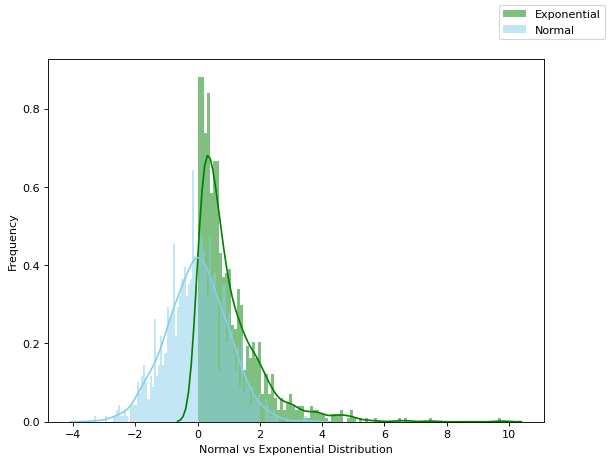

In [24]:
figure(figsize=(8, 6), dpi=80)

expon_distr = expon.rvs(scale=1, loc=0, size=1000)

normal_distr = norm.rvs(size=1000, loc=0, scale=1)


ax = sns.distplot(expon_distr,
                  kde=True,
                  bins=100,
                  color='green',
                  label='Exponential',
                  hist_kws={"linewidth": 15,'alpha':0.5})

ax2 = sns.distplot(normal_distr,
                  bins=100,
                  kde=True,
                  color='skyblue',
                   label='Normal',
                  hist_kws={"linewidth": 15,'alpha':0.5})

ax2.set(xlabel='Normal vs Exponential Distribution', ylabel='Frequency')
ax.figure.legend()

plt.show;

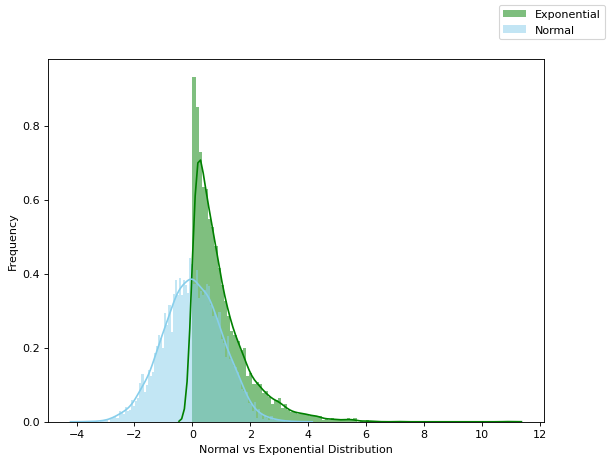

In [27]:
expon_means5 = []
for e in range(1000):
    expon_means5.append(expon.rvs(scale=1, loc=0, size=5))
        
normal_means5 = []
for n in range(1000):
    normal_means5.append(norm.rvs(size=5, loc=0, scale=1))

    
figure(figsize=(8, 6), dpi=80)
ax = sns.distplot(expon_means5,
                  kde=True,
                  bins=100,
                  color='green',
                  label='Exponential',
                  hist_kws={"linewidth": 15,'alpha':0.5})

ax2 = sns.distplot(normal_means5,
                  bins=100,
                  kde=True,
                  color='skyblue',
                   label='Normal',
                  hist_kws={"linewidth": 15,'alpha':0.5})

ax2.set(xlabel='Normal vs Exponential Distribution - Samples of size 5', ylabel='Frequency')
ax.figure.legend()

plt.show;

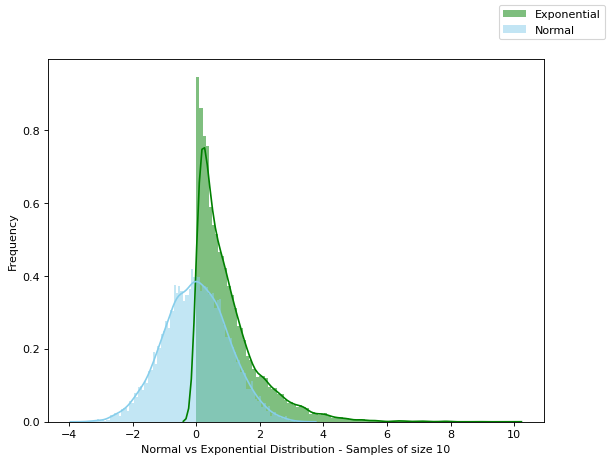

In [10]:
# вычисляется среднее из 1000 выборок для n = 10

expon_means10 = []
for e in range(1000):
    expon_means10.append(expon.rvs(scale=1, loc=0, size=10))
        
normal_means10 = []
for n in range(1000):
    normal_means10.append(norm.rvs(size=10, loc=0, scale=1))

    
figure(figsize=(8, 6), dpi=80)
ax = sns.distplot(expon_means10,
                  kde=True,
                  bins=100,
                  color='green',
                  label='Exponential',
                  hist_kws={"linewidth": 15,'alpha':0.5})

ax2 = sns.distplot(normal_means10,
                  bins=100,
                  kde=True,
                  color='skyblue',
                   label='Normal',
                  hist_kws={"linewidth": 15,'alpha':0.5})

ax2.set(xlabel='Normal vs Exponential Distribution - Samples of size 10', ylabel='Frequency')
ax.figure.legend()

plt.show;

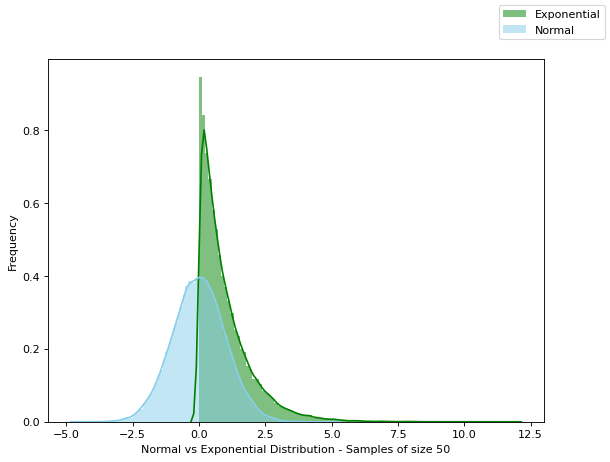

In [11]:
# вычисляется среднее из 1000 выборок для n = 50

expon_means50 = []
for e in range(1000):
    expon_means50.append(expon.rvs(scale=1, loc=0, size=50))
        
normal_means50 = []
for n in range(1000):
    normal_means50.append(norm.rvs(size=50, loc=0, scale=1))

    
figure(figsize=(8, 6), dpi=80)
ax = sns.distplot(expon_means50,
                  kde=True,
                  bins=100,
                  color='green',
                  label='Exponential',
                  hist_kws={"linewidth": 15,'alpha':0.5})

ax2 = sns.distplot(normal_means50,
                  bins=100,
                  kde=True,
                  color='skyblue',
                   label='Normal',
                  hist_kws={"linewidth": 15,'alpha':0.5})

ax2.set(xlabel='Normal vs Exponential Distribution - Samples of size 50', ylabel='Frequency')
ax.figure.legend()

plt.show;

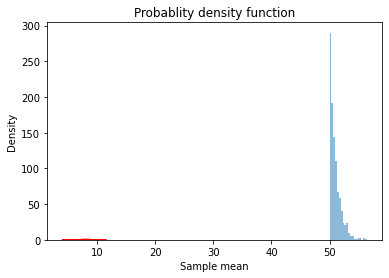

In [9]:
# вычисляется среднее из 1000 выборок для n = 50
smeans = []
for i in range(1000):
    smeans.append(expon.rvs(50).mean())
    
# строим гистограмму
plt.hist(smeans, 20, alpha=0.5, label='sample means histogram')

# строим pdf нормального распределения
x = np.arange(4.,12.,0.5)
plt.plot(x, norm.pdf(x, k, np.sqrt(2 * k/ 50.)), 'r', alpha=1, label='norm theoretical pdf')
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.title('Probablity density function')
plt.show()

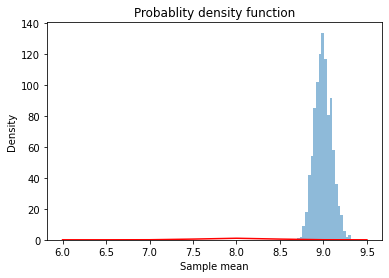

In [10]:
# вычисляется среднее из 1000 выборок для n = 100
smeans = []
for i in range(1000):
    smeans.append(expon(k).rvs(100).mean())
    
# строим гистограмму
plt.hist(smeans, 20, alpha=0.5, label='sample means histogram')

# строим pdf нормального распределения
x = np.arange(6.,10.,0.5)
plt.plot(x, norm.pdf(x, k, np.sqrt(2 * k/ 100.)), 'r', alpha=1, label='norm theoretical pdf')
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.title('Probablity density function')
plt.show()

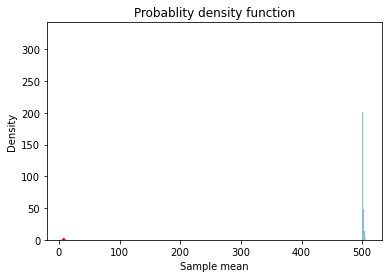

In [11]:

# вычисляется среднее из 1000 выборок для n = 500
smeans = []
for i in range(1000):
    smeans.append(expon.rvs(500).mean())
    
# строим гистограмму
plt.hist(smeans, 20, alpha=0.5, label='sample means histogram')

# строим pdf нормального распределения
x = np.arange(6.,10.,0.5)
plt.plot(x, norm.pdf(x, k, np.sqrt(2 * k/ 500.)), 'r', alpha=1, label='norm theoretical pdf')
plt.xlabel('Sample mean')
plt.ylabel('Density')
plt.title('Probablity density function')
plt.show()

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

По результатам проыеденных экспериментов с различными значениями n(5, 10, 50) можно сделать следующие выводы: При увеличении размера выборки n среднеквадратичное отклонение падает. Т.е. при увеличении размера выборки n точность возрастает точность аппроксимации функции, а гистограмма приближается к теоретической функции распределения.